In [1]:
#Author: Tarteel Alkaraan (25847208)
#Last Updated: 07/03/2025
#This is an edited and extended version of (Yu, 2025e)
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Read Data
Data = pd.read_csv('Housing.csv')
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#Check Data Information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#Perform Descriptive Statistics
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Check Unique Values of every row for every column
N = Data.nunique(axis = 0)
print(f'Number of Unique Values in Every Column:\n{N}\n')

Number of Unique Values in Every Column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64



In [6]:
#Count NaN Values in Data
CountNaN = Data.isna().sum()
print(f'Number of Missing Values in Every Variable:\n{CountNaN}\n')

Number of Missing Values in Every Variable:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



In [7]:
#Change Categorical Variable mainroad into Numerical
Labels = {'yes': 1, 'no': 2}
Data['mainroad'] = Data['mainroad'].map(Labels)

In [8]:
#Change Categorical Variable guestroom into Numerical
Labels = {'yes': 1, 'no': 2}
Data['guestroom'] = Data['guestroom'].map(Labels)

In [9]:
#Change Categorical Variable basement into Numerical
Labels = {'yes': 1, 'no': 2}
Data['basement'] = Data['basement'].map(Labels)

In [10]:
#Change Categorical Variable hotwaterheating into Numerical
Labels = {'yes': 1, 'no': 2}
Data['hotwaterheating'] = Data['hotwaterheating'].map(Labels)

In [11]:
#Change Categorical Variable airconditioning into Numerical
Labels = {'yes': 1, 'no': 2}
Data['airconditioning'] = Data['airconditioning'].map(Labels)

In [12]:
#Change Categorical Variable prefarea into Numerical
Labels = {'yes': 1, 'no': 2}
Data['prefarea'] = Data['prefarea'].map(Labels)

In [13]:
#Change Categorical Variable furnishingstatus into Numerical
Labels = {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3}
Data['furnishingstatus'] = Data['furnishingstatus'].map(Labels)
Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,1
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,1
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,2
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,1


In [14]:
#Data Normalisation
Scaler = MinMaxScaler()
SC = ['price', 'area']
Data[SC] = Scaler.fit_transform(Data[SC])
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,2,2,2,1,2,1,1
1,0.909091,0.502405,4,4,4,1,2,2,2,1,3,2,1
2,0.909091,0.571134,3,2,2,1,2,1,2,2,2,1,2
3,0.906061,0.402062,4,2,2,1,2,1,2,1,3,1,1
4,0.836364,0.396564,4,1,2,1,1,1,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,2,1,2,2,2,2,3
541,0.001485,0.051546,3,1,1,2,2,2,2,2,0,2,2
542,0.000000,0.135395,2,1,1,1,2,2,2,2,0,2,3
543,0.000000,0.086598,3,1,1,2,2,2,2,2,0,2,1


In [15]:
#Preparing Model Training/Testing Data
X = Data.drop('price', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = Data['price']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [16]:
#Model Training and Testing
Regressor = LinearRegression()
Regressor.fit(X_Train, Y_Train)

Y_Tr_Pred = Regressor.predict(X_Train)
Y_Te_Pred = Regressor.predict(X_Test)

In [17]:
X_Train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
475,0.092784,2,1,2,1,2,2,2,2,0,2,2
196,0.414845,3,1,1,1,1,1,1,2,0,2,2
165,0.329897,3,2,1,1,1,1,1,2,0,2,3
89,0.476289,5,3,2,1,2,2,2,2,2,2,1
167,0.202749,2,2,1,1,2,2,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.414433,4,2,4,1,1,2,2,1,1,2,2
187,0.305842,3,1,1,1,2,1,2,1,0,1,2
211,0.773196,3,1,1,1,2,2,2,2,2,2,1
238,0.196564,4,2,2,1,2,1,2,2,0,2,2


In [18]:
X_Test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
163,0.355670,3,1,1,1,1,1,2,1,0,1,2
221,0.121649,4,2,2,1,2,2,2,2,0,2,2
268,0.226804,4,1,2,1,2,2,2,1,0,2,2
55,0.298969,3,1,2,1,2,2,2,1,1,2,3
515,0.107216,3,1,2,1,2,1,2,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.125773,3,1,1,2,2,2,2,1,0,2,3
410,0.151203,3,1,1,1,2,2,2,2,0,2,3
409,0.105498,2,1,1,1,2,2,2,2,2,2,3
347,0.116838,3,1,2,1,2,2,2,2,0,2,3


In [19]:
Y_Train

475    0.104848
196    0.278788
165    0.314545
89     0.406061
167    0.306061
         ...   
58     0.472727
187    0.290909
211    0.272727
238    0.247879
321    0.196970
Name: price, Length: 381, dtype: float64

In [20]:
Y_Test

163    0.318182
221    0.261212
268    0.227879
55     0.484848
515    0.060606
         ...   
394    0.151515
410    0.145455
409    0.145455
347    0.180606
156    0.326667
Name: price, Length: 164, dtype: float64

In [21]:
Y_Tr_Pred

array([0.12616839, 0.35736563, 0.39894576, 0.5052265 , 0.3139791 ,
       0.2455148 , 0.27275811, 0.28942677, 0.46754738, 0.4314399 ,
       0.14003489, 0.26794369, 0.02299199, 0.39842405, 0.21463227,
       0.33531515, 0.38980264, 0.16380337, 0.41308473, 0.34733711,
       0.14691309, 0.29767011, 0.09676659, 0.19412901, 0.53886295,
       0.26259071, 0.18189113, 0.34691531, 0.21223221, 0.19211669,
       0.08248857, 0.56111598, 0.17425404, 0.24574695, 0.14388664,
       0.09286013, 0.40793528, 0.47616148, 0.38776008, 0.26241719,
       0.59348847, 0.13571831, 0.31768802, 0.39114184, 0.23064138,
       0.15417542, 0.19100893, 0.27872755, 0.11553008, 0.36957386,
       0.31106222, 0.43831232, 0.21263948, 0.20536431, 0.17930886,
       0.15454391, 0.29393025, 0.30060791, 0.27273754, 0.40407793,
       0.17929599, 0.25566796, 0.27182429, 0.0166563 , 0.18567705,
       0.20352215, 0.27585818, 0.35861155, 0.44374431, 0.26006187,
       0.16282439, 0.24266828, 0.12436351, 0.44076194, 0.25506

In [22]:
Y_Te_Pred

array([0.36102203, 0.24738764, 0.26584161, 0.27330057, 0.1601451 ,
       0.16016046, 0.18686566, 0.25309363, 0.42094046, 0.24591819,
       0.54505385, 0.14575739, 0.08913638, 0.18263044, 0.18692765,
       0.48456743, 0.45949702, 0.16571101, 0.01861785, 0.3032937 ,
       0.26755991, 0.19559695, 0.26975887, 0.22530242, 0.12290312,
       0.12220899, 0.40161027, 0.26610011, 0.47782093, 0.29448291,
       0.27922714, 0.25197549, 0.16960968, 0.32252904, 0.27809067,
       0.18533086, 0.31501342, 0.15206461, 0.1061865 , 0.38976839,
       0.16048921, 0.40534624, 0.14661749, 0.30016983, 0.05704393,
       0.08449281, 0.46240709, 0.34342138, 0.46792769, 0.47463114,
       0.10324521, 0.21238665, 0.20769968, 0.19145166, 0.43200052,
       0.05965498, 0.28285657, 0.3291255 , 0.29107876, 0.49180475,
       0.34894936, 0.38509579, 0.13986693, 0.29081804, 0.10115738,
       0.07049121, 0.10228113, 0.177706  , 0.07829986, 0.37224572,
       0.49856952, 0.19696238, 0.3680232 , 0.33282182, 0.39228

In [23]:
#Train and Test Data Model Evaluation
Test_MSE = mean_squared_error(Y_Test, Y_Te_Pred)
Test_MAE = mean_absolute_error(Y_Test, Y_Te_Pred)
Test_RMSE = np.sqrt(Test_MSE)

Train_MSE = mean_squared_error(Y_Train, Y_Tr_Pred)
Train_MAE = mean_absolute_error(Y_Train, Y_Tr_Pred)
Train_RMSE = np.sqrt(Train_MSE)

In [24]:
#Print Test Set Model Evaluation
print('Test Set:')
print('\nMean Squared Error: ', Test_MSE)
print('Mean Absolute Error: ', Test_MAE)
print('Root Mean Square Error: ', Test_RMSE)

Test Set:

Mean Squared Error:  0.010536340467680354
Mean Absolute Error:  0.07243960505273087
Root Mean Square Error:  0.10264667782096192


In [25]:
#Print Train Set Model Evaluation
print('Train Set:')
print('\nMean Squared Error: ', Train_MSE)
print('Mean Absolute Error: ', Train_MAE)
print('Root Mean Square Error: ', Train_RMSE)

Train Set:

Mean Squared Error:  0.007606667924293087
Mean Absolute Error:  0.06567437806954958
Root Mean Square Error:  0.08721621365487661


In [26]:
#Make Table Displaying Predicted vs Actual Price Values
Table = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Te_Pred})
print(Table)

       Actual  Predicted
163  0.318182   0.361022
221  0.261212   0.247388
268  0.227879   0.265842
55   0.484848   0.273301
515  0.060606   0.160145
..        ...        ...
394  0.151515   0.112052
410  0.145455   0.103534
409  0.145455   0.110319
347  0.180606   0.129495
156  0.326667   0.290924

[164 rows x 2 columns]


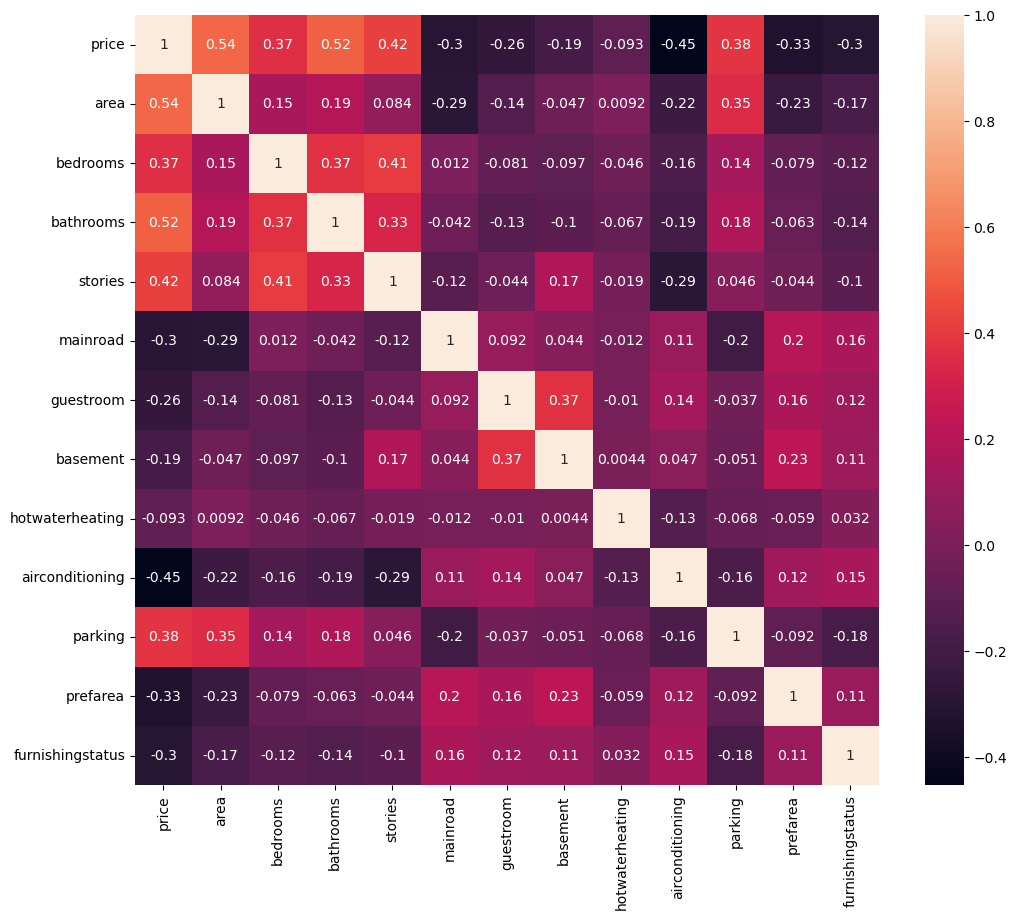

In [27]:
#Heatmap Visualisation
plt.figure(figsize=(12,10))
Correlation = Data.corr()
sns.heatmap(Correlation, annot = True)
plt.show()

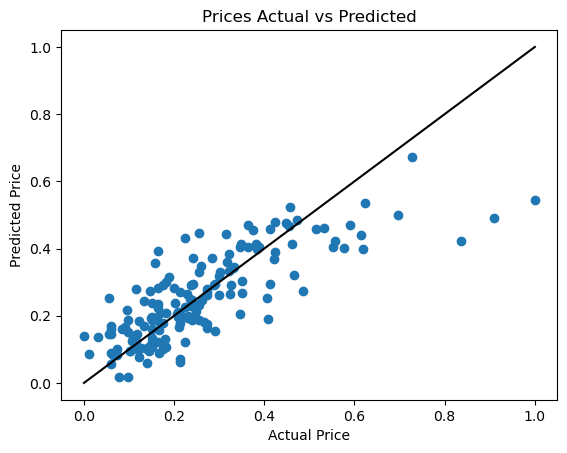

In [28]:
#Scatter Plot Visualisation
plt.scatter(Y_Test, Y_Te_Pred)
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color = 'black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Prices Actual vs Predicted")
plt.show()